***K-Means Clustering:***

->K-Means is a popular unsupervised machine learning algorithm used to partition data into K distinct clusters. The algorithm tries to minimize the
  variance within each cluster and maximize the variance between clusters.

->How K-Means Works:

->Initialization: Randomly select K initial cluster centroids.

->Assignment Step: Assign each data point to the closest centroid.

->Update Step: Calculate the new centroid of each cluster by computing the mean of all the points assigned to that cluster.

->Repeat the assignment and update steps until convergence (i.e., the centroids no longer change or the change is minimal).

->Drawback :

->Sensitive to outliers:

Problem: K-means is sensitive to outliers because they can dramatically affect the positions of centroids. Outliers can shift the mean and distort the final clusters.

->DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

A density-based clustering algorithm that can find clusters of arbitrary shapes and is robust to outliers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Define the data points (A, B, C, D, E, F)
data = np.array([
    [2, 3],  # Point A
    [3, 3],  # Point B
    [6, 8],  # Point C
    [8, 8],  # Point D
    [7, 5],  # Point E
    [9, 5]   # Point F
])


In [3]:

# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

 

In [4]:
# Get the cluster centers (centroids) and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

 

# Print the final centroids and cluster assignments
print("Final Centroids (Cluster Centers):")
print(centroids)

print("\nCluster Assignments:")
for i, label in enumerate(labels):
    print(f"Point {chr(65+i)}: Cluster {label+1}")



Final Centroids (Cluster Centers):
[[7.5 6.5]
 [2.5 3. ]]

Cluster Assignments:
Point A: Cluster 2
Point B: Cluster 2
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1


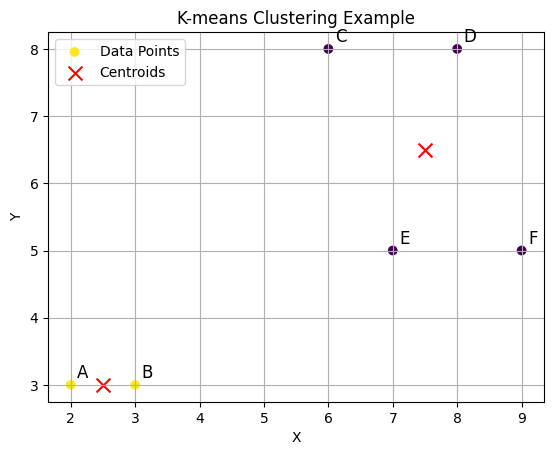

In [13]:
# Plot the data points and the centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
# Annotate points
for i, point in enumerate(data):
    plt.text(point[0]+0.1, point[1]+0.1, f'{chr(65+i)}', fontsize=12)
    plt.title('K-means Clustering Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

 

***K-Means Clustering using Dataset***

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [46]:
import pandas as pd
df = pd.read_csv('marketing_campaign1.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [48]:
# Step 2: Convert categorical columns into numerical representations
# Using pd.get_dummies for categorical columns
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

In [50]:
# Step 3: Data Cleaning (check for missing values)
print("\nMissing Values:")
print(df_encoded.isnull().sum())


Missing Values:
ID                          0
Year_Birth                  0
Income                     24
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
Education_2n Cycle          0
Education_Basic             0
Education_Graduation        0
Education_Master            0
Education_PhD               0
Marital_Status_Absurd  

In [52]:
# Step 4: Descriptive statistics
print("\nDescriptive Statistics:")
print(df_encoded.describe())


Descriptive Statistics:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000   

In [54]:
# Check if there are missing values in the 'Income' column
print("Missing Values in Income Column:")
print(df['Income'].isnull().sum())

Missing Values in Income Column:
24


In [56]:
# Impute missing values with the mean of the 'Income' column
mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

C:\Users\CVR\AppData\Local\Temp\ipykernel_10976\470015162.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(mean_income, inplace=True)


In [58]:
# Verify if there are any missing values left in the dataset
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [60]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

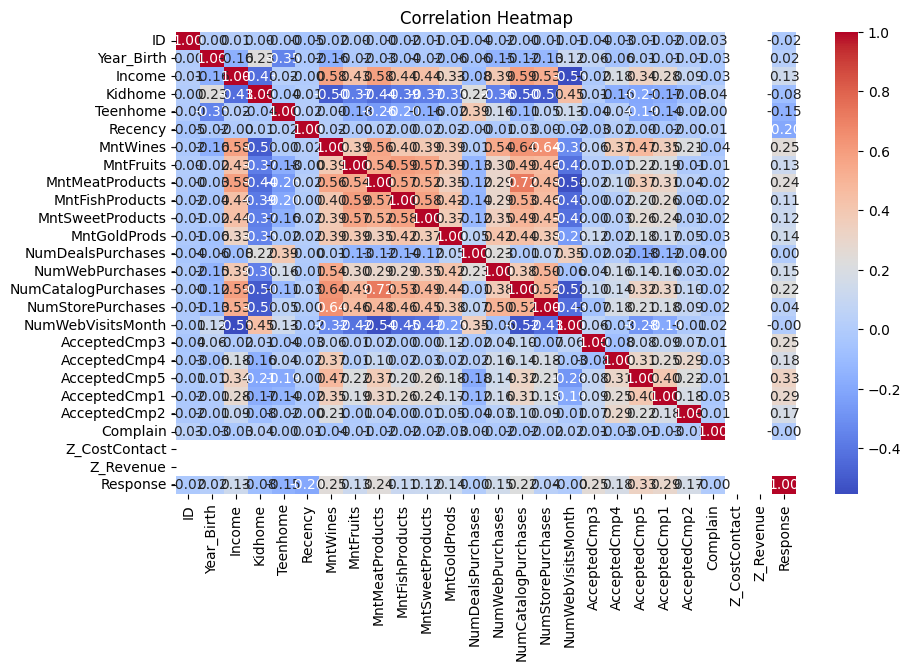

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are considered for correlation calculation
df_numeric = df_encoded.select_dtypes(include=['float64', 'int64'])

# Step 5: Visualizing the data distribution using the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Convert 'Dt_Customer' to days since customer joined (if not already done)
df_encoded['Days_Since_Customer'] = (pd.to_datetime('today') - pd.to_datetime(df_encoded['Dt_Customer'], format='%d-%m-%Y')).dt.days

# Drop the original 'Dt_Customer' column if necessary
df_encoded = df_encoded.drop(columns=['Dt_Customer'])

# Select only numeric columns for scaling
df_numeric = df_encoded.select_dtypes(include=['float64', 'int64'])

# Scale the numeric data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Optionally, if you want to convert the scaled data back into a DataFrame
df_scaled_df = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Check the scaled data
print(df_scaled_df.head())


         ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0 -0.020999   -0.985345  0.234063 -0.825218 -0.929894  0.307039  0.983781   
1 -1.053058   -1.235733 -0.234559  1.032559  0.906934 -0.383664 -0.870479   
2 -0.447070   -0.317643  0.769478 -0.825218 -0.929894 -0.798086  0.362723   
3  0.181716    1.268149 -1.017239  1.032559 -0.929894 -0.798086 -0.870479   
4 -0.082614    1.017761  0.240221  1.032559 -0.929894  1.550305 -0.389085   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp3  \
0   1.551577         1.679702         2.462147  ...      -0.28014   
1  -0.636301        -0.713225        -0.650449  ...      -0.28014   
2   0.570804        -0.177032         1.345274  ...      -0.28014   
3  -0.560857        -0.651187        -0.503974  ...      -0.28014   
4   0.419916        -0.216914         0.155164  ...      -0.28014   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0      -0.28383      -0.28014     -0.262111      -0

In [82]:
# Drop rows with missing values
df_scaled_df = df_scaled_df.dropna()

# Proceed with KMeans clustering
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_df)
    inertia.append(kmeans.inertia_)



In [84]:
from sklearn.impute import SimpleImputer

# Use SimpleImputer to replace missing values with the median of the column
imputer = SimpleImputer(strategy='median')
df_scaled_df = pd.DataFrame(imputer.fit_transform(df_scaled_df), columns=df_scaled_df.columns)

# Proceed with KMeans clustering
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_df)
    inertia.append(kmeans.inertia_)


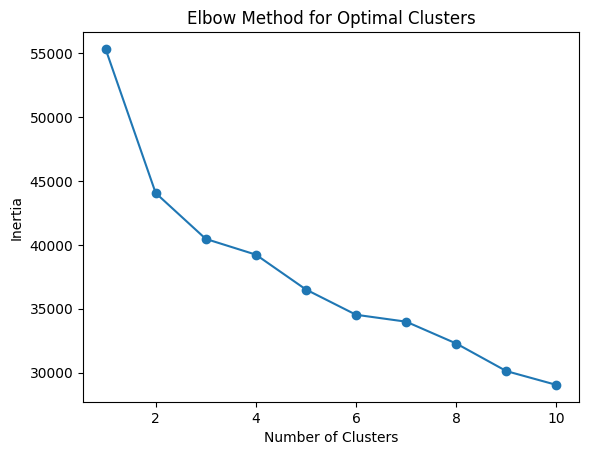

In [86]:
import matplotlib.pyplot as plt

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [92]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming you've already dropped or imputed missing values in df_encoded, 
# repeat the same preprocessing for df_scaled_df (i.e., impute or drop missing values)

# Make sure both datasets have the same number of rows
imputer = SimpleImputer(strategy='median')
df_encoded_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Now scale the imputed data
scaler = StandardScaler()
df_scaled_df = pd.DataFrame(scaler.fit_transform(df_encoded_imputed), columns=df_encoded_imputed.columns)

# Perform KMeans clustering on the scaled and imputed data
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled_df)

# Now the 'Cluster' column should be assigned correctly


In [98]:

# Step 8: PCA for visualization (reduce dimensions to 2D for visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled_df)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_encoded['Cluster']


c:\Users\CVR\Desktop\22B81A6717\21-02-2025\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


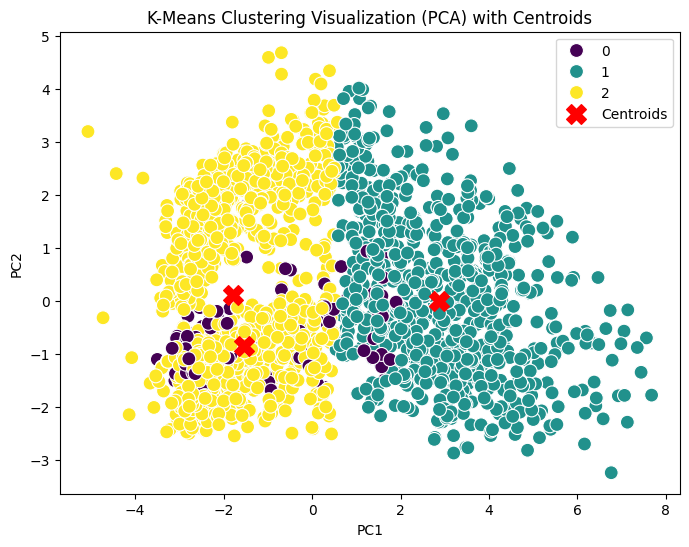

In [106]:
import numpy as np

# Calculate the centroids in the PCA space
# First, get the cluster centers in the original space (after performing KMeans)
centroids = kmeans.cluster_centers_

# Then, project these cluster centers onto the 2D PCA space
centroid_pca = pca.transform(centroids)

# Plotting the clusters with centroids
plt.figure(figsize=(8, 6))

# Scatter plot of the data points
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100)

# Plotting the centroids as red 'X' markers
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], marker='X', s=200, c='red', label='Centroids')

# Title and Legend
plt.title('K-Means Clustering Visualization (PCA) with Centroids')
plt.legend()
plt.show()


In [102]:

# Step 10: Analyze cluster centers
print("\nCluster Centers (Centroids):")
print(kmeans.cluster_centers_)



Cluster Centers (Centroids):
[[-0.02128857  0.38691281 -0.51158358  0.34494022 -0.08304492  0.04040083
  -0.61351571 -0.25385522 -0.46262406 -0.17927969 -0.27450516 -0.20659492
   0.05361378 -0.41386525 -0.53983439 -0.45089183  0.29510272 -0.08015168
  -0.16022423 -0.28014028 -0.23563534 -0.11651035  0.10486205  0.
   0.         -0.23630961  3.16772517 -0.15717078 -1.00626965 -0.44481565
  -0.5263848  -0.02989406 -0.03662078 -0.02024534  0.06136476 -0.09495145
   0.07597192 -0.08175226 -0.02989406 -0.02537442 -0.96643485]
 [ 0.02074708 -0.16043827  0.81168841 -0.71593668 -0.16707035  0.01474982
   0.92760458  0.77080478  0.90696914  0.7828098   0.77180843  0.61693911
  -0.19868636  0.61485315  0.95135971  0.85943111 -0.69927685  0.03237132
   0.23124312  0.45811175  0.39025448  0.17005941 -0.0118264   0.
   0.          0.25848081 -0.11487566 -0.14950057  0.08316339 -0.02978638
   0.06159632  0.04888559 -0.03662078  0.04233344 -0.05041013  0.00819189
  -0.00561124  0.06316112 -0.029894

In [104]:
# Step 11: Assign the cluster labels to the original dataset
df['Cluster'] = df_encoded['Cluster']
print("\nFinal Dataset with Cluster Labels:")
print(df[['ID', 'Income', 'Kidhome', 'Teenhome', 'Cluster']].head())



Final Dataset with Cluster Labels:
     ID   Income  Kidhome  Teenhome  Cluster
0  5524  58138.0        0         0        1
1  2174  46344.0        1         1        2
2  4141  71613.0        0         0        1
3  6182  26646.0        1         0        2
4  5324  58293.0        1         0        2
